# Netflix movies duration

Given the large number of movies and series available on the Netflix platform, we can ask ourself, is the average duration of movies has been declining?

To see if this is the case we'll make a brief Netflix movies classification using a CSV file containing Netflix data and we'll give an answer.

# 0. Import libraries

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Overview

In [4]:
netflix_df = pd.read_csv("netflix_data.csv")

In [5]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [6]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [7]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


# 2. Filtering for movies

In [11]:
netflix_df_movies_only = netflix_df[netflix_df.loc[:,'type'] == 'Movie']
netflix_movies = netflix_df_movies_only[['title','country','genre','release_year','duration']]

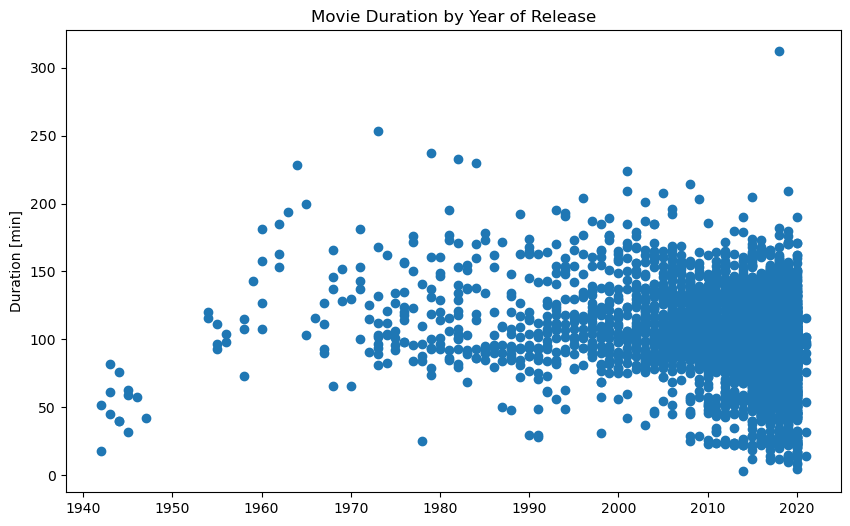

In [19]:
fig = plt.figure(figsize=(10,6))
plt.scatter(netflix_movies[['release_year']],netflix_movies[['duration']])
plt.ylabel('Duration [min]')
plt.title("Movie Duration by Year of Release")

We can see that some of these films are under an hour long so let's filter the movies with a duration under 60 minutes and look at the genres. This might give us some insight to the average duration.

In [21]:
short_movies = netflix_movies[netflix_movies.loc[:,'duration'] < 60]
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries".  To explore the effect of these genres on our data would be to plot them, but mark them with a different color.

In [23]:
colors = []
for lab, row in netflix_movies.iterrows():
    if row['genre'] == "Children" :
        colors.append('red')
    elif row['genre'] == "Documentaries" :
        colors.append('blue')
    elif row['genre'] == "Stand-Up" :
        colors.append('green')
    else:
        colors.append('black')
               
print(colors[0:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


Text(0, 0.5, 'Duration (min)')

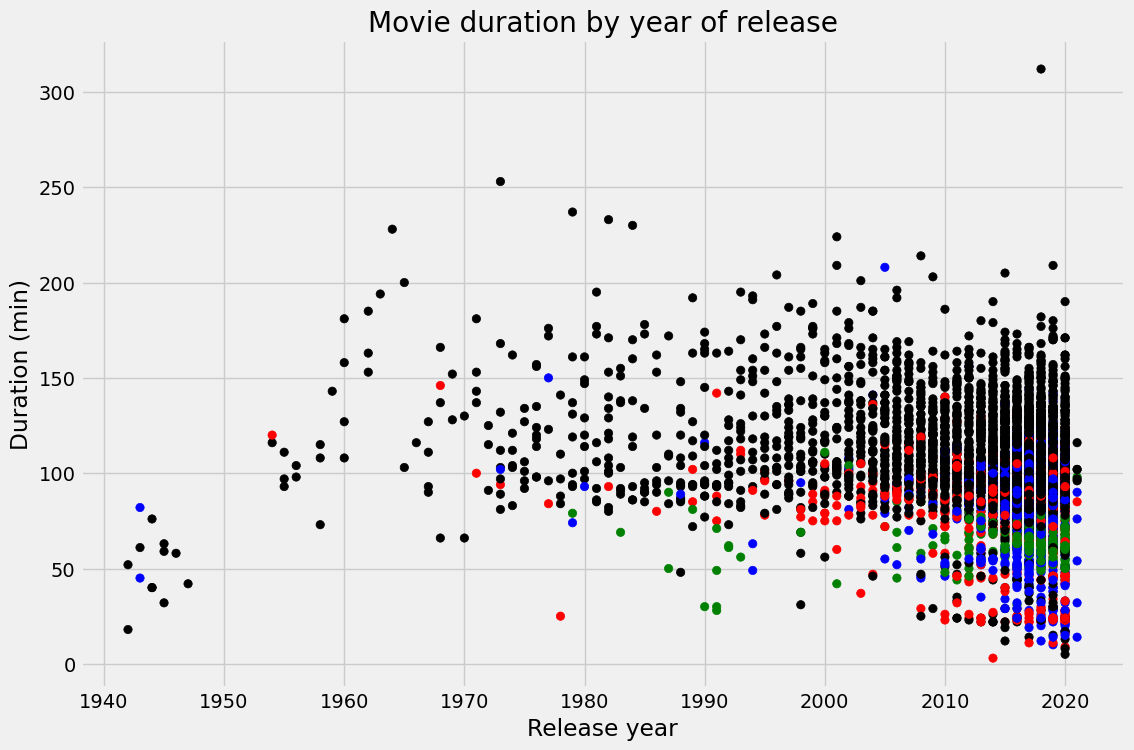

In [70]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies[['release_year']],netflix_movies[['duration']],color = colors)
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

To be more precise let's see how many different genres there are in the dataset and plot vs duration.

In [52]:
netflix_movies['genre'].unique()

array(['Dramas', 'Horror Movies', 'Action', 'Documentaries',
       'Independent Movies', 'Comedies', 'Sports Movies', 'Uncategorized',
       'International Movies', 'Sci-Fi', 'Children', 'Classic Movies',
       'Thrillers', 'Stand-Up', 'Anime Features', 'Music', 'Cult Movies',
       'Romantic Movies', 'LGBTQ Movies'], dtype=object)

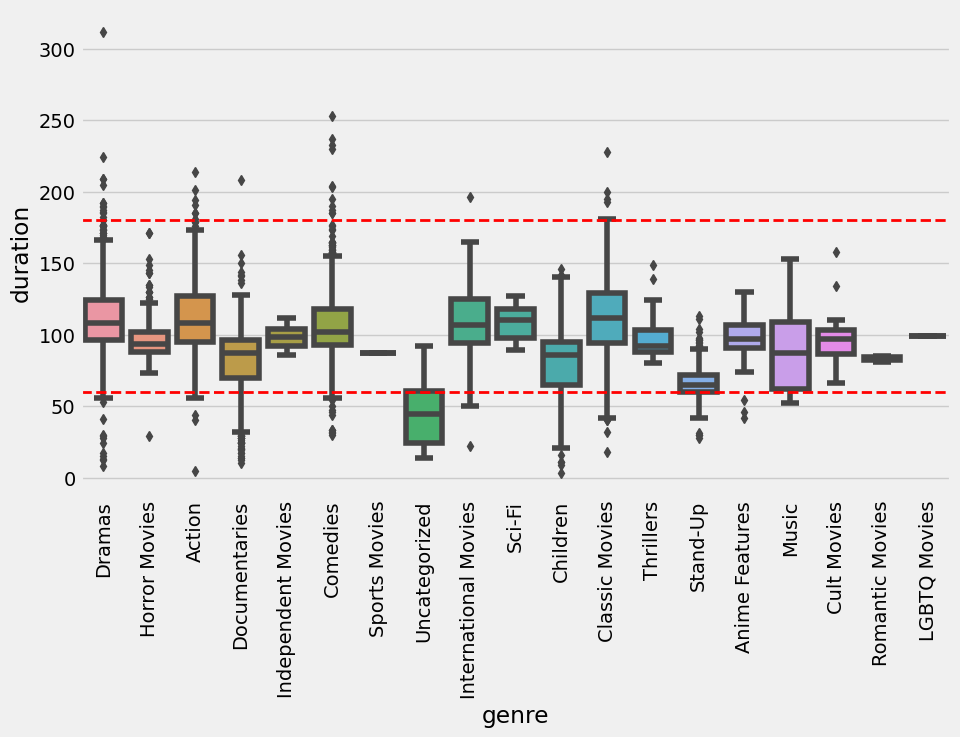

In [78]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = netflix_movies['genre'],y = netflix_movies['duration'])
plt.xticks(rotation = 90)
plt.axhline(y = 180, linestyle='--', linewidth = 2, color = 'r')
plt.axhline(y = 60, linestyle='--', linewidth = 2, color = 'r')
plt.show()

We can see there are a lot of outlies that of course can affect the average duration but also we can se the most movies are between 1hr and 3hrs. 

To make sure if the movies are getting shorter maybe first we should ask, in what genre?. So we'll make new filter considering only the 10 most popular movie's genres and do an average.

In [93]:
netflix_movies.groupby('genre')['title'].count().sort_values(ascending = False)[:11]

genre
Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
Children                 502
Stand-Up                 321
Horror Movies            244
International Movies     114
Classic Movies            77
Uncategorized             56
Thrillers                 49
Name: title, dtype: int64

We'll drop the 'Uncategorized' genre for obvious reasons.

In [132]:
pop_gen_ind = netflix_movies.groupby('genre')['title'].count().sort_values(ascending = False)[:11].index
pop_gen_10 = pop_gen_ind.drop('Uncategorized')

In [133]:
pop_gen_10

Index(['Dramas', 'Comedies', 'Documentaries', 'Action', 'Children', 'Stand-Up',
       'Horror Movies', 'International Movies', 'Classic Movies', 'Thrillers'],
      dtype='object', name='genre')

In [138]:
netflix_pop_movies = netflix_movies[netflix_movies['genre'].isin(pop_gen_10)]
netflix_pop_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [143]:
netflix_pop_movies.groupby(['release_year'])['duration'].mean()

release_year
1942    35.000000
1943    62.666667
1944    52.000000
1945    51.333333
1946    58.000000
          ...    
2017    95.128099
2018    96.749644
2019    93.739054
2020    90.064356
2021    80.166667
Name: duration, Length: 72, dtype: float64

Text(0, 0.5, 'Duration [min]')

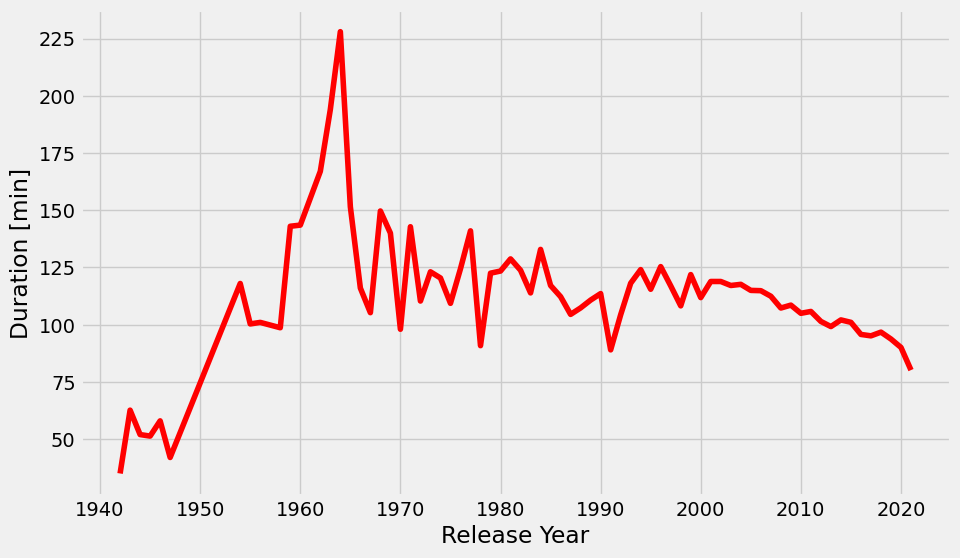

In [160]:
fig = plt.figure(figsize = (10,6))
plt.plot(netflix_pop_movies.groupby(['release_year'])['duration'].mean(), color = 'r')
plt.xlabel('Release Year')
plt.ylabel('Duration [min]')

Let's take a look to that striking peak.

In [163]:
netflix_pop_movies_1960_1970 = netflix_pop_movies[(netflix_pop_movies['release_year'] > 1960) & (netflix_pop_movies['release_year'] < 1970)]
netflix_pop_movies_1960_1970.groupby(['release_year','title']).sum()

duration
release_year title                                    
1962         Lolita                                153
             Mutiny on the Bounty                  185
             Professor                             163
1963         Saladin                               194
1964         Sangam                                228
1965         Doctor Zhivago                        200
             The Cincinnati Kid                    103
1966         Amrapali                              116
1967         Bonnie and Clyde                      111
             Cool Hand Luke                        127
             Westerplatte Resists                   93
             Who's That Knocking at My Door?        90
1968         Chitty Chitty Bang Bang               146
             Once Upon a Time in the West          166
             Rosemary's Baby                       137
1969         Prince                                152
             True Grit                             128

It is because it is the only film registered in that year, a very long one.

# 3. Conclusion

Follow this approach we can conclude that he movies are getting shorter almost at the same level of 50's years but of course we are only taking an average. The film industry has changed in recent years and we got more and more movies each time (as we can see in the first plot), so still we can make a better filter to obtain more accurate results.